In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import nltk

In [73]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeyar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jeyar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jeyar\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jeyar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jeyar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
df = pd.read_csv("Reviews.csv")

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(568454, 10)

In [58]:
df = df.head(500)

In [8]:
df.shape

(500, 10)

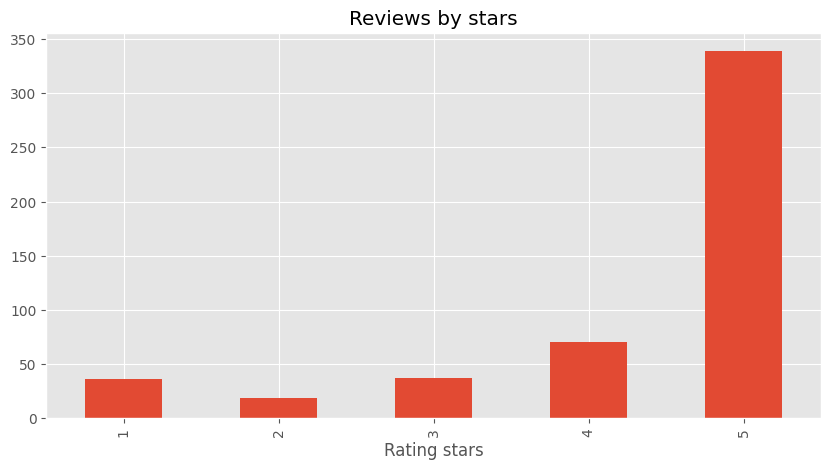

In [21]:
ax = df['Score'].value_counts().sort_index()\
.plot(kind='bar',title='Reviews by stars',figsize=(10,5))
ax.set_xlabel('Rating stars')
plt.show()

In [23]:
example = df["Text"][7]
example

'This taffy is so good.  It is very soft and chewy.  The flavors are amazing.  I would definitely recommend you buying it.  Very satisfying!!'

In [30]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'taffy', 'is', 'so', 'good', '.', 'It', 'is', 'very', 'soft']

In [36]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('taffy', 'NN'),
 ('is', 'VBZ'),
 ('so', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('soft', 'JJ')]

refer this to find out the part of speech of you word: https://www.nltk.org/book/ch05.html

In [45]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  taffy/NN
  is/VBZ
  so/RB
  good/JJ
  ./.
  It/PRP
  is/VBZ
  very/RB
  soft/JJ
  and/CC
  chewy/NN
  ./.
  The/DT
  flavors/NNS
  are/VBP
  amazing/VBG
  ./.
  I/PRP
  would/MD
  definitely/RB
  recommend/VB
  you/PRP
  buying/VBG
  it/PRP
  ./.
  Very/RB
  satisfying/JJ
  !/.
  !/.)


Vendors method

In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [53]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [55]:
sia.polarity_scores("I am sad")

{'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}

In [56]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}

In [59]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row["Text"]
    id = row["Id"]
    res[id] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [60]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [64]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={"index":'Id'})
vaders = vaders.merge(df,how='left')

In [65]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.799,0.142,0.7833,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


Text(0.5, 1.0, 'Analyzing rating and the compound score')

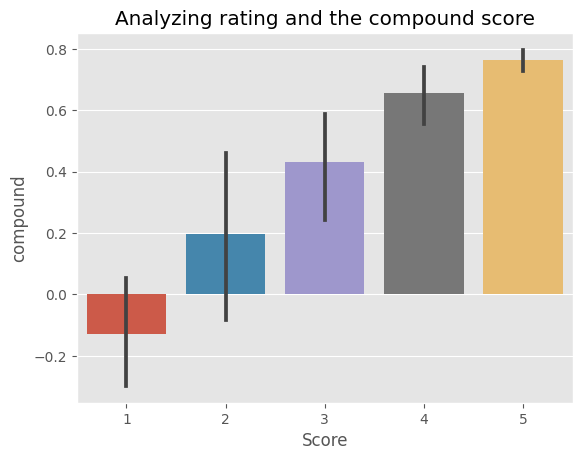

In [67]:
ax = sns.barplot(data=vaders,x="Score",y="compound")
ax.set_title("Analyzing rating and the compound score")

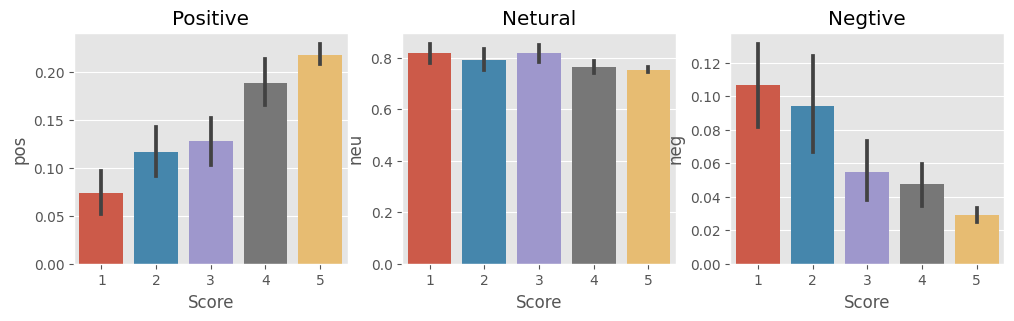

In [71]:
fig ,axs = plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x="Score",y="pos",ax=axs[0])
sns.barplot(data=vaders,x="Score",y="neu",ax=axs[1])
sns.barplot(data=vaders,x="Score",y="neg",ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Netural")
axs[2].set_title("Negtive")
plt.show()

Roberta pretrained model from hugging face

In [74]:
pip install transformers

                                              0.0/7.0 MB ? eta -:--:--
                                              0.0/7.0 MB 1.4 MB/s eta 0:00:06
                                              0.1/7.0 MB 1.3 MB/s eta 0:00:06
     -                                        0.3/7.0 MB 1.9 MB/s eta 0:00:04
     --                                       0.5/7.0 MB 2.6 MB/s eta 0:00:03
     -----                                    1.0/7.0 MB 4.3 MB/s eta 0:00:02
     ---------                                1.7/7.0 MB 6.2 MB/s eta 0:00:01
     -----------------                        3.1/7.0 MB 9.7 MB/s eta 0:00:01
     -------------------                      3.3/7.0 MB 10.1 MB/s eta 0:00:01
     ----------------------                   3.9/7.0 MB 9.9 MB/s eta 0:00:01
     ----------------------                   3.9/7.0 MB 9.9 MB/s eta 0:00:01
     ------------------------                 4.3/7.0 MB 8.6 MB/s eta 0:00:01
     -------------------------                4.5/7.0 MB 8.2 MB/s eta 

In [81]:
pip install scipy


                                              0.0/42.2 MB ? eta -:--:--
                                              0.0/42.2 MB 1.3 MB/s eta 0:00:33
                                              0.1/42.2 MB 1.3 MB/s eta 0:00:33
                                              0.3/42.2 MB 2.0 MB/s eta 0:00:22
                                              0.5/42.2 MB 2.8 MB/s eta 0:00:15
                                              1.0/42.2 MB 4.5 MB/s eta 0:00:10
     -                                        2.0/42.2 MB 7.4 MB/s eta 0:00:06
     --                                       2.4/42.2 MB 8.6 MB/s eta 0:00:05
     --                                       2.4/42.2 MB 8.6 MB/s eta 0:00:05
     --                                       3.0/42.2 MB 7.6 MB/s eta 0:00:06
     ---                                      3.2/42.2 MB 7.8 MB/s eta 0:00:05
     ---                                      3.2/42.2 MB 7.8 MB/s eta 0:00:05
     ----                                     4.3/42.2 MB 

In [83]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [84]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\jeyar\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jeyar\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
